## Shared Bikes Demand Prediction - Solution

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has gathered a large dataset on daily bike demands across the American market based on some factors. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue. Also they want manipulate the business strategy to meet the demand levels and meet the customer's expectations.

Essentially, the company wants to know —

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands


#### The solution is divided into the following sections:
- Data Cleaning
- EDA
- Data preparation - creating dummy variables
- Model building and evaluation

### 1) Importing the basic libraries & loading data

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv into dataframe

df = pd.read_csv("day.csv")

### 2) Data Inespection

In [3]:
# printing top 5 rows to see if there are any headers other than column name

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# printing bottom 5 rows to see if there are any footers like page number
# also we can observe that weekday 6=Saturday & 0=Sunday

df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
# Checking the shape of dataframe (rows, columns)

df.shape

(730, 16)

In [6]:
# Checking the number of columns, its datatype & number of null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### 3) Data Cleaning - check for missing values & data inconsistencies

In [7]:
# Checking if there are any null values & we can conclude that there is no missing data

df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# lets drop the instant column, from data dictionary we know the instant is just a serial number & its dont help in any analysis.

df = df.drop('instant', axis=1)

In [9]:
# converting the date time column into datatime type

df.dteday = pd.to_datetime(df.dteday, format='%d-%m-%Y')

### 4) Mapping Categorical column to Original state

In [10]:
# from data dictionary we know the season is a categorical column, so mapping back to original values.

df.season.astype('category') # changing the column datatype, so that it stores object datatype
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.season.head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [11]:
# from data dictionary we know the weather situation is a categorical column, so mapping back to original values.

df.weathersit.astype('category') # changing the column datatype, so that it stores object datatype
df.weathersit = df.weathersit.map({1:'normal', 2:'cloudy', 3:'bad', 4:'worst'})
df.weathersit.head()

0    cloudy
1    cloudy
2    normal
3    normal
4    normal
Name: weathersit, dtype: object

In [12]:
# Converting the numerical value of month into correspoding categorical columns

df.mnth.astype('category') # changing the column datatype, so that it stores object datatype
df.mnth = pd.to_datetime(df.mnth, format='%m').dt.strftime('%b') # Converting month col to datetime & then extacting string
df.mnth.head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: mnth, dtype: object

In [13]:
# Converting the day of week into correspoding week columns

df.weekday.astype('category') # changing the column datatype, so that it stores object datatype
df.weekday = df.weekday.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
print(df.weekday.head())

0     Saturday
1       Sunday
2       Monday
3      Tuesday
4    Wednesday
Name: weekday, dtype: object


In [14]:
# one final check of the dataframe

df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,0,Saturday,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,0,Jan,0,Sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,0,Jan,0,Monday,1,normal,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,0,Jan,0,Tuesday,1,normal,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,0,Jan,0,Wednesday,1,normal,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
# one final check for dtype of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 85.7+ 

### 5) EDA

In [16]:
# getting staticial insight about the data

df.describe()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018-12-31 12:00:00,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2018-07-02 06:00:00,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,2018-12-31 12:00:00,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,2019-07-01 18:00:00,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,2019-12-31 00:00:00,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,NaN,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


In [17]:
# Seperating the categorical & numerical

catcol = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

numcol = ['temp','atemp','hum','windspeed','casual','registered']

#### a) Uni-variate

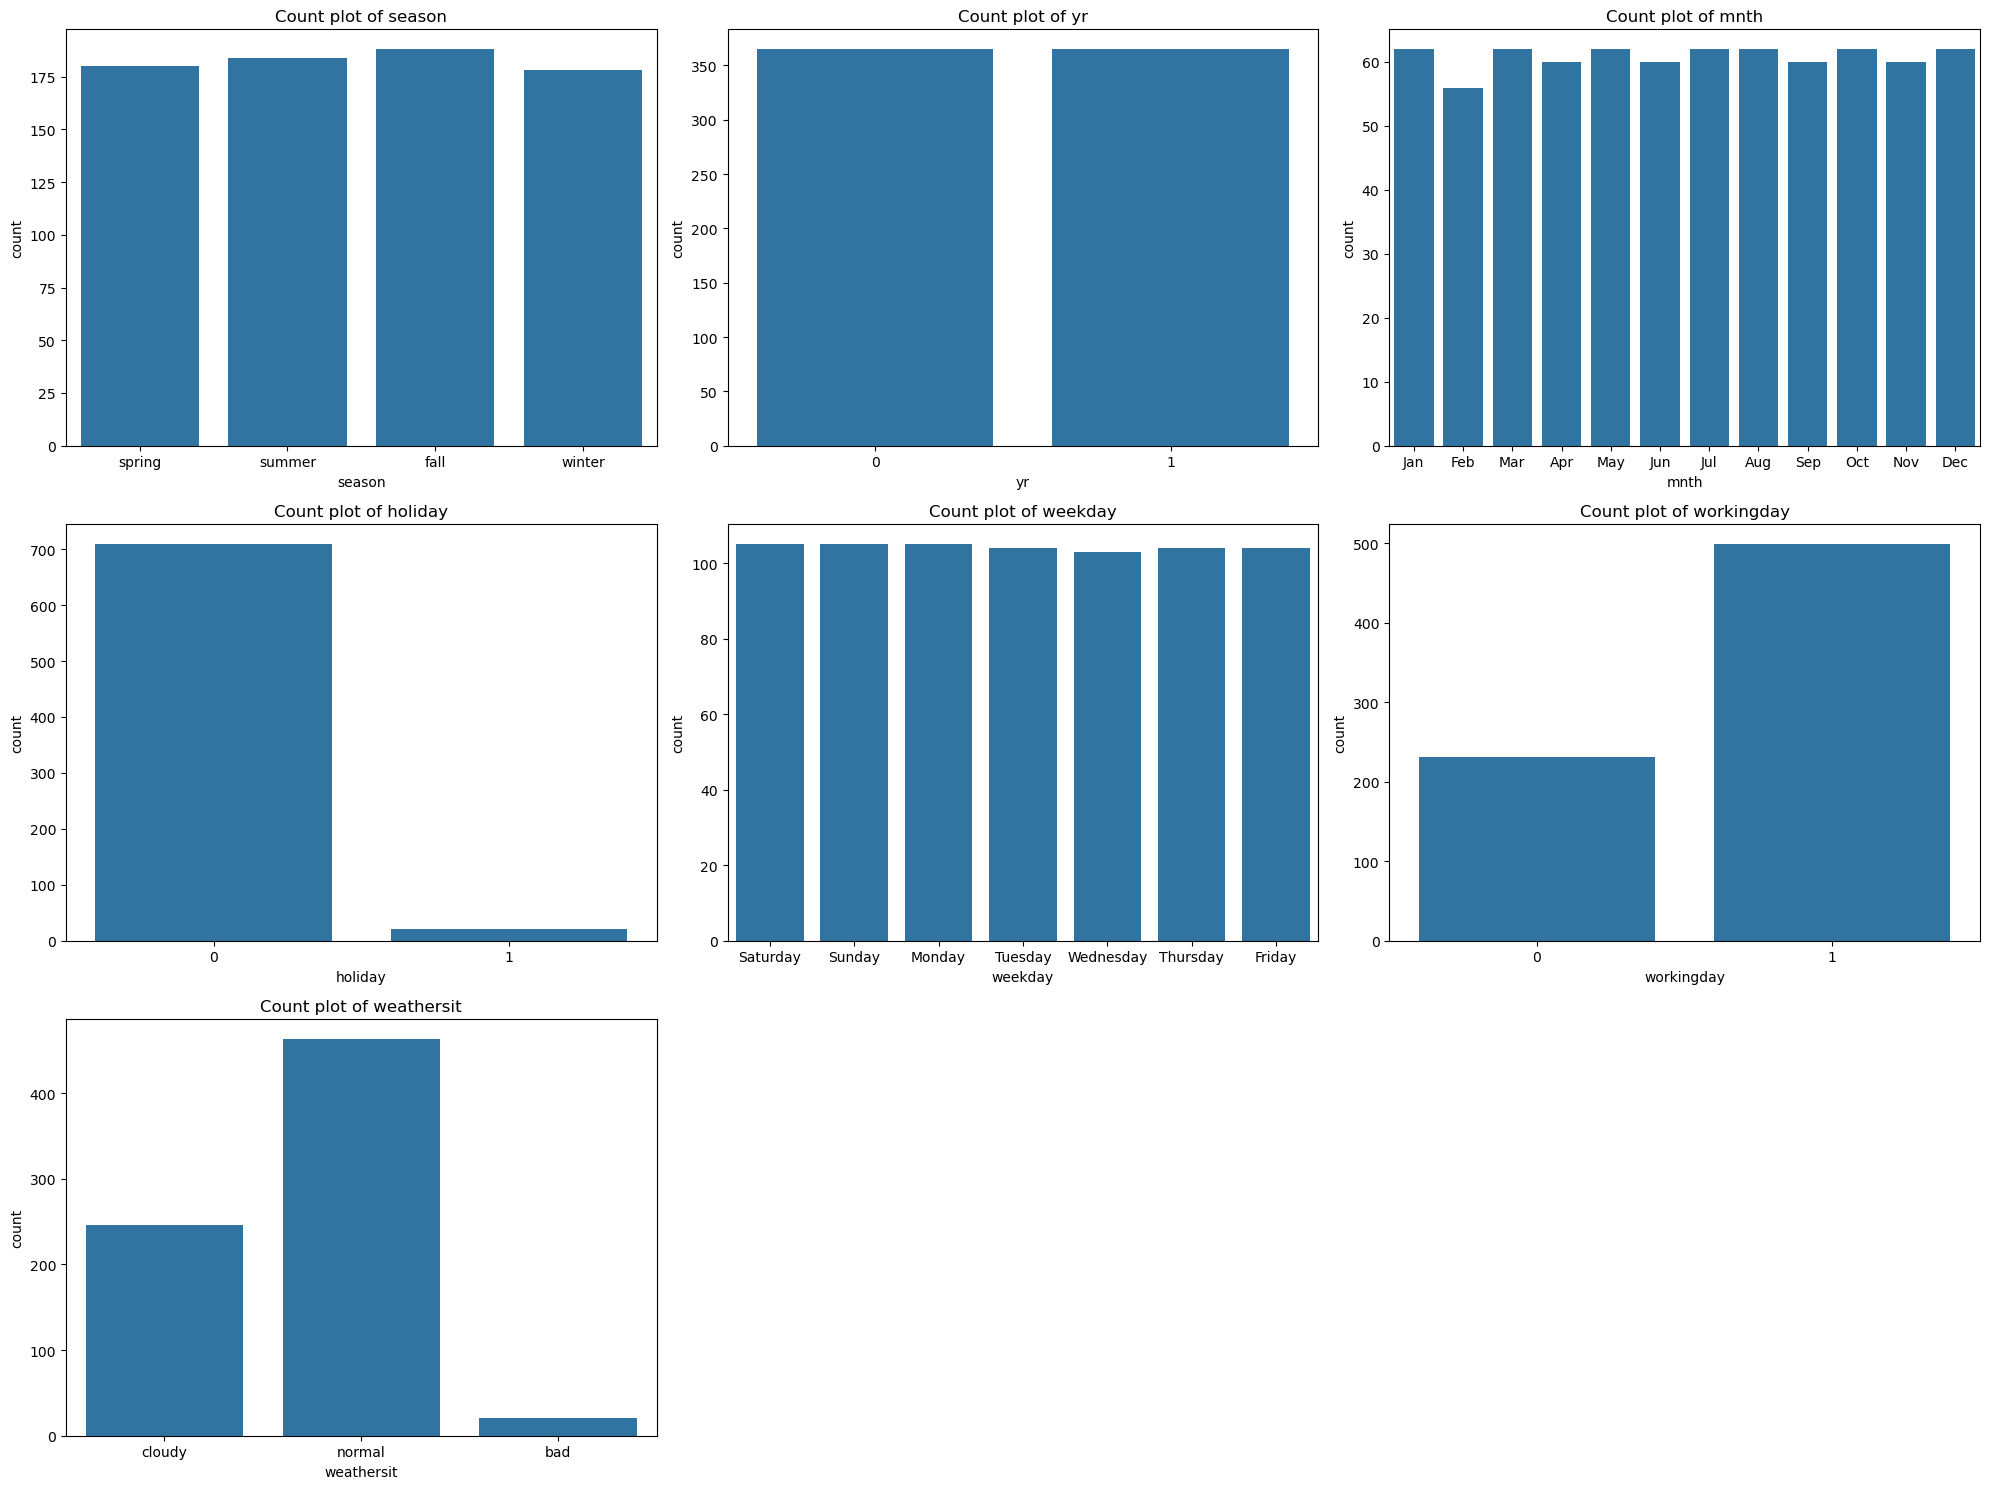

In [18]:
# Count plot for all the categorical columns

plt.figure(figsize=(20,15))

n = len(catcol)

for i in range(n):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=catcol[i])
    plt.title(f'Count plot of {catcol[i]}')

plt.tight_layout()

#### Observations -

- most of the days normal weather prevails followed by cloudy weather
- number of spring, summer, fall & winter are almost
- months have 30 & 31 days, since its for 2 years we observe values around 60
- number of working days are more

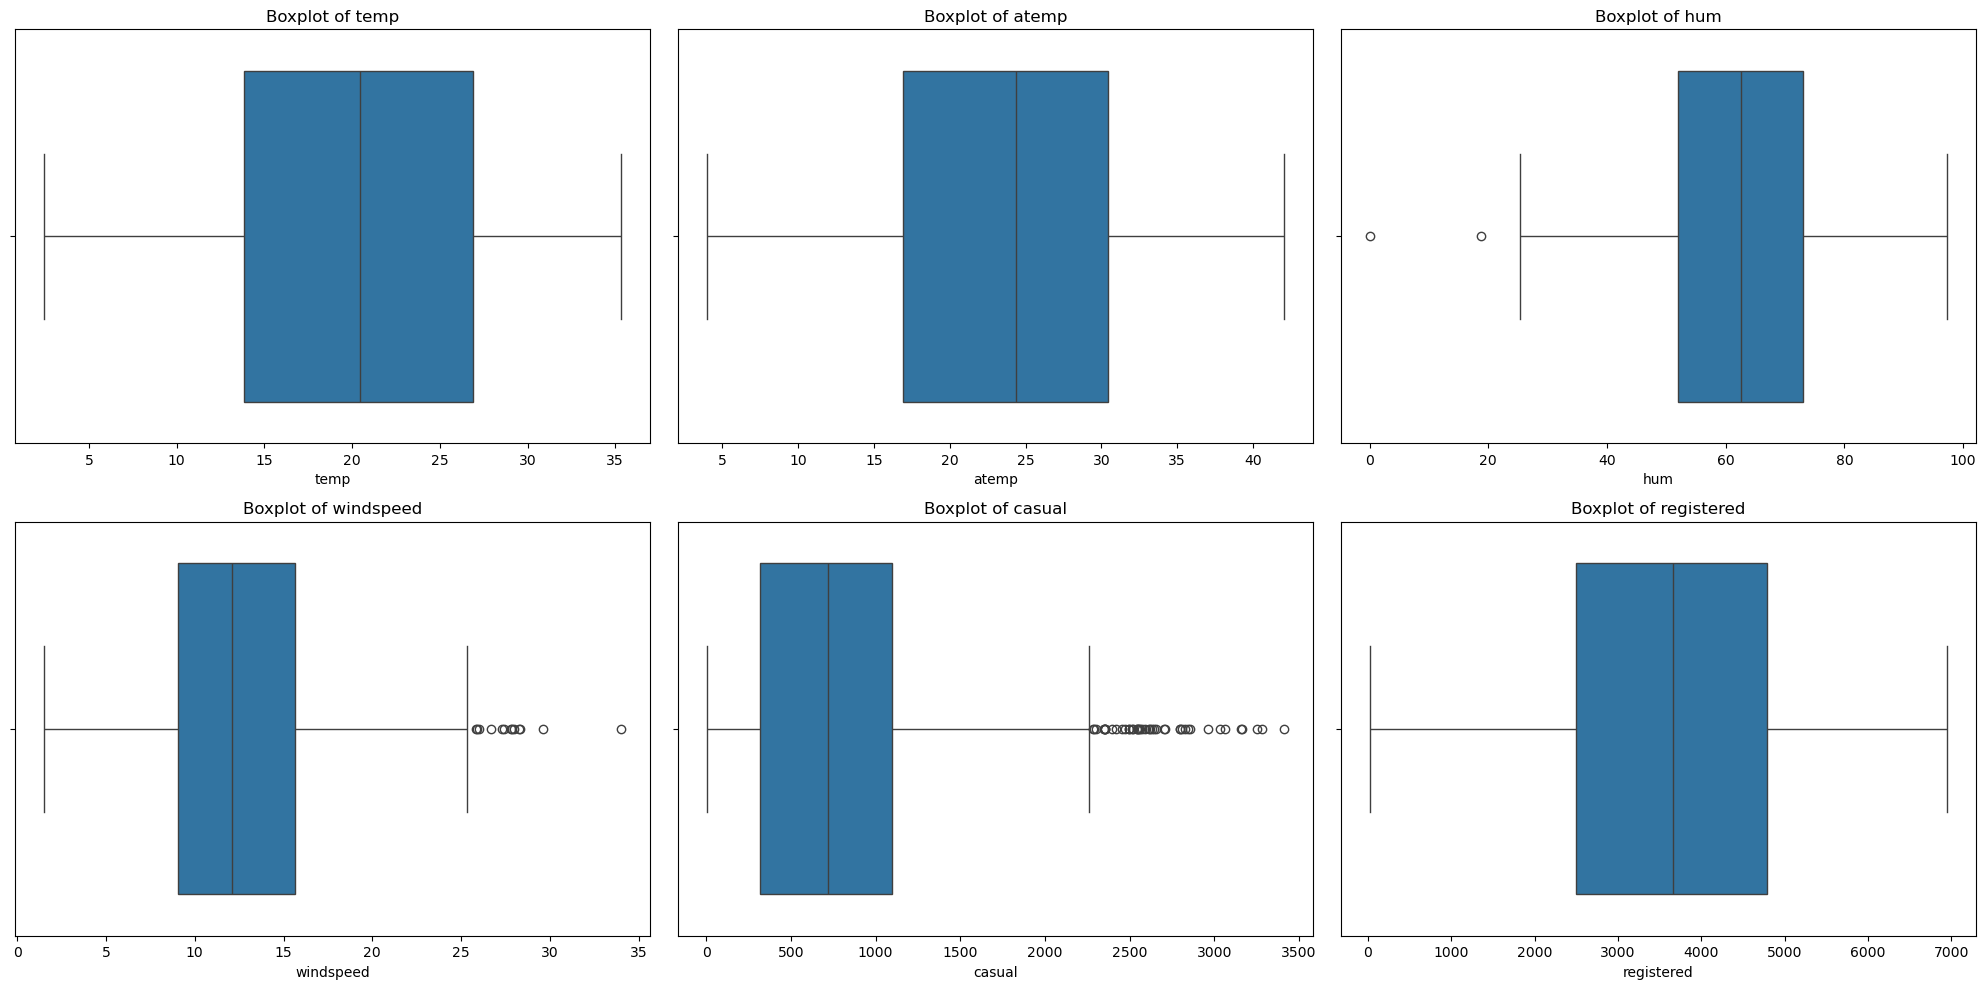

In [19]:
plt.figure(figsize=(20,10))
n = len(numcol)

for i in range(n):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df, x=numcol[i])
    plt.title(f'Boxplot of {numcol[i]}')

plt.tight_layout()

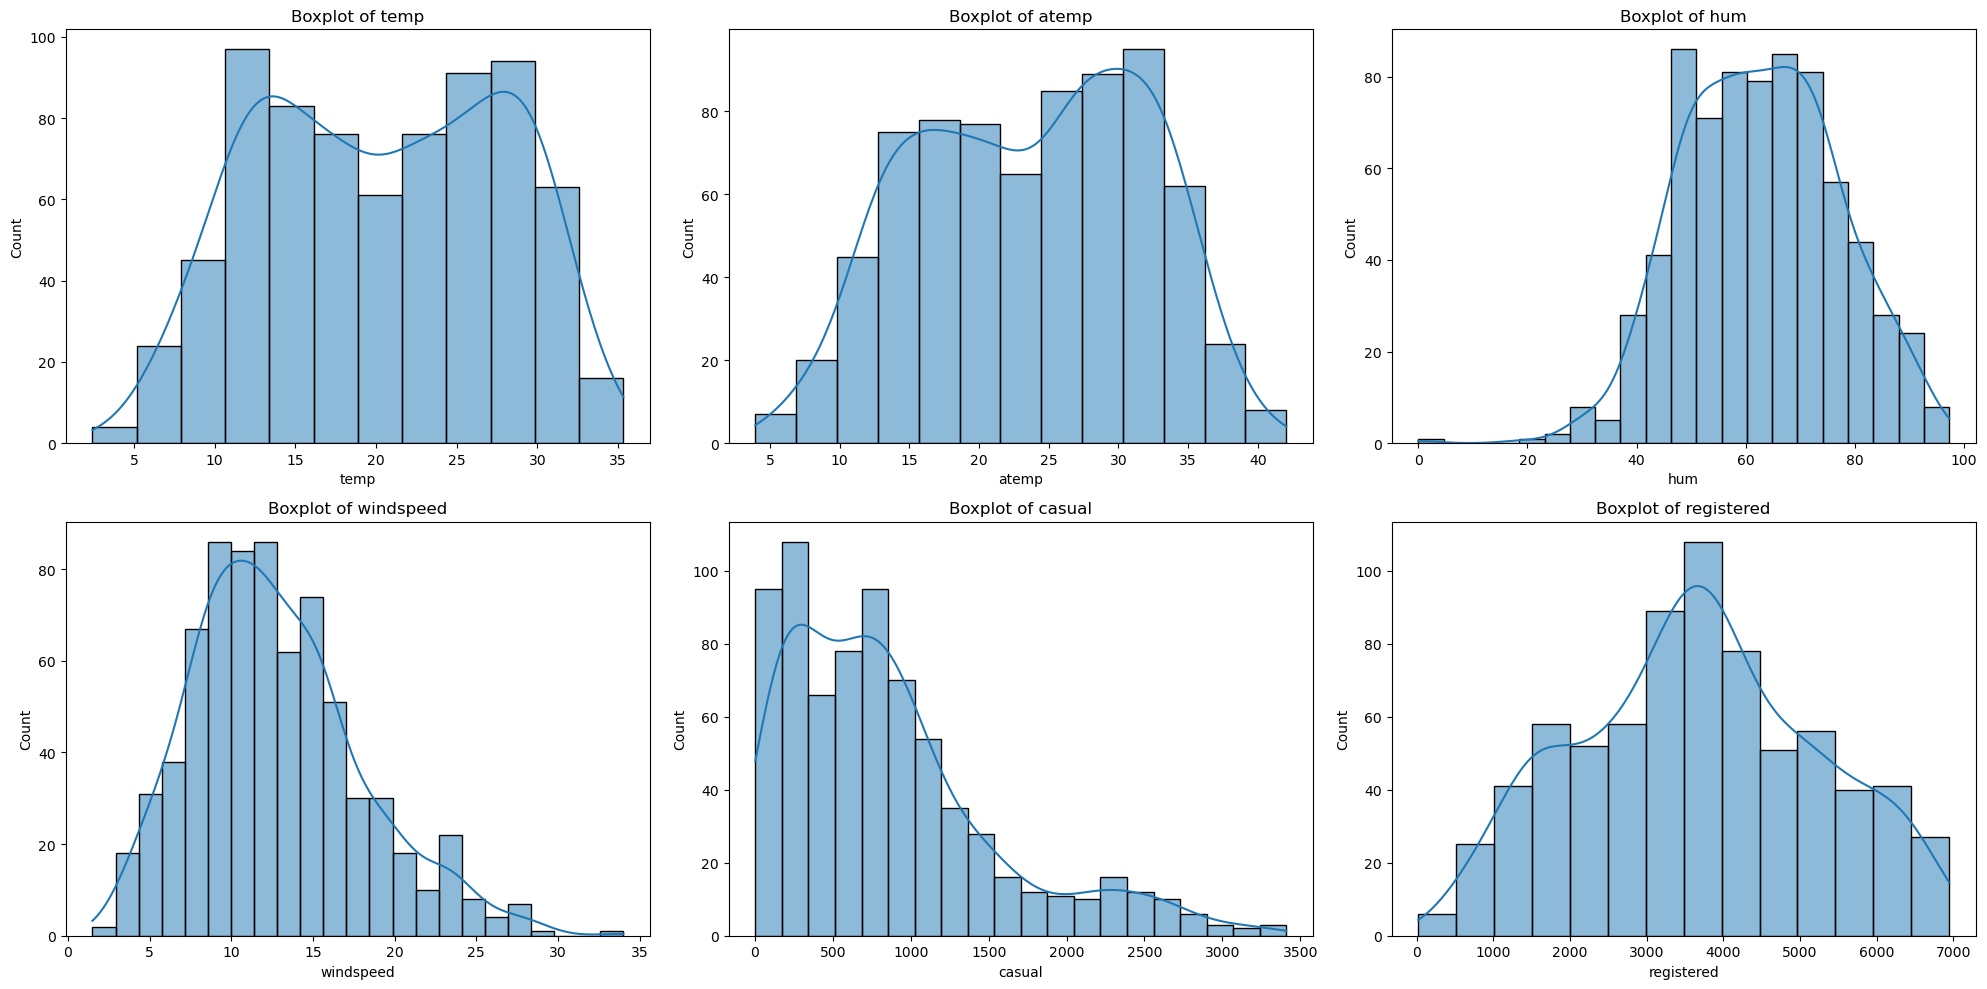

In [20]:
plt.figure(figsize=(20,10))
n = len(numcol)

for i in range(n):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df, x=numcol[i], kde=True)
    plt.title(f'Boxplot of {numcol[i]}')

plt.tight_layout()

#### Observations -

- most of the days temprature lies around 12 & 27
- most of the days humidity lies between 50 to 70
- most of the days windspeed lies between 8 to 17

#### b) Bi-variat

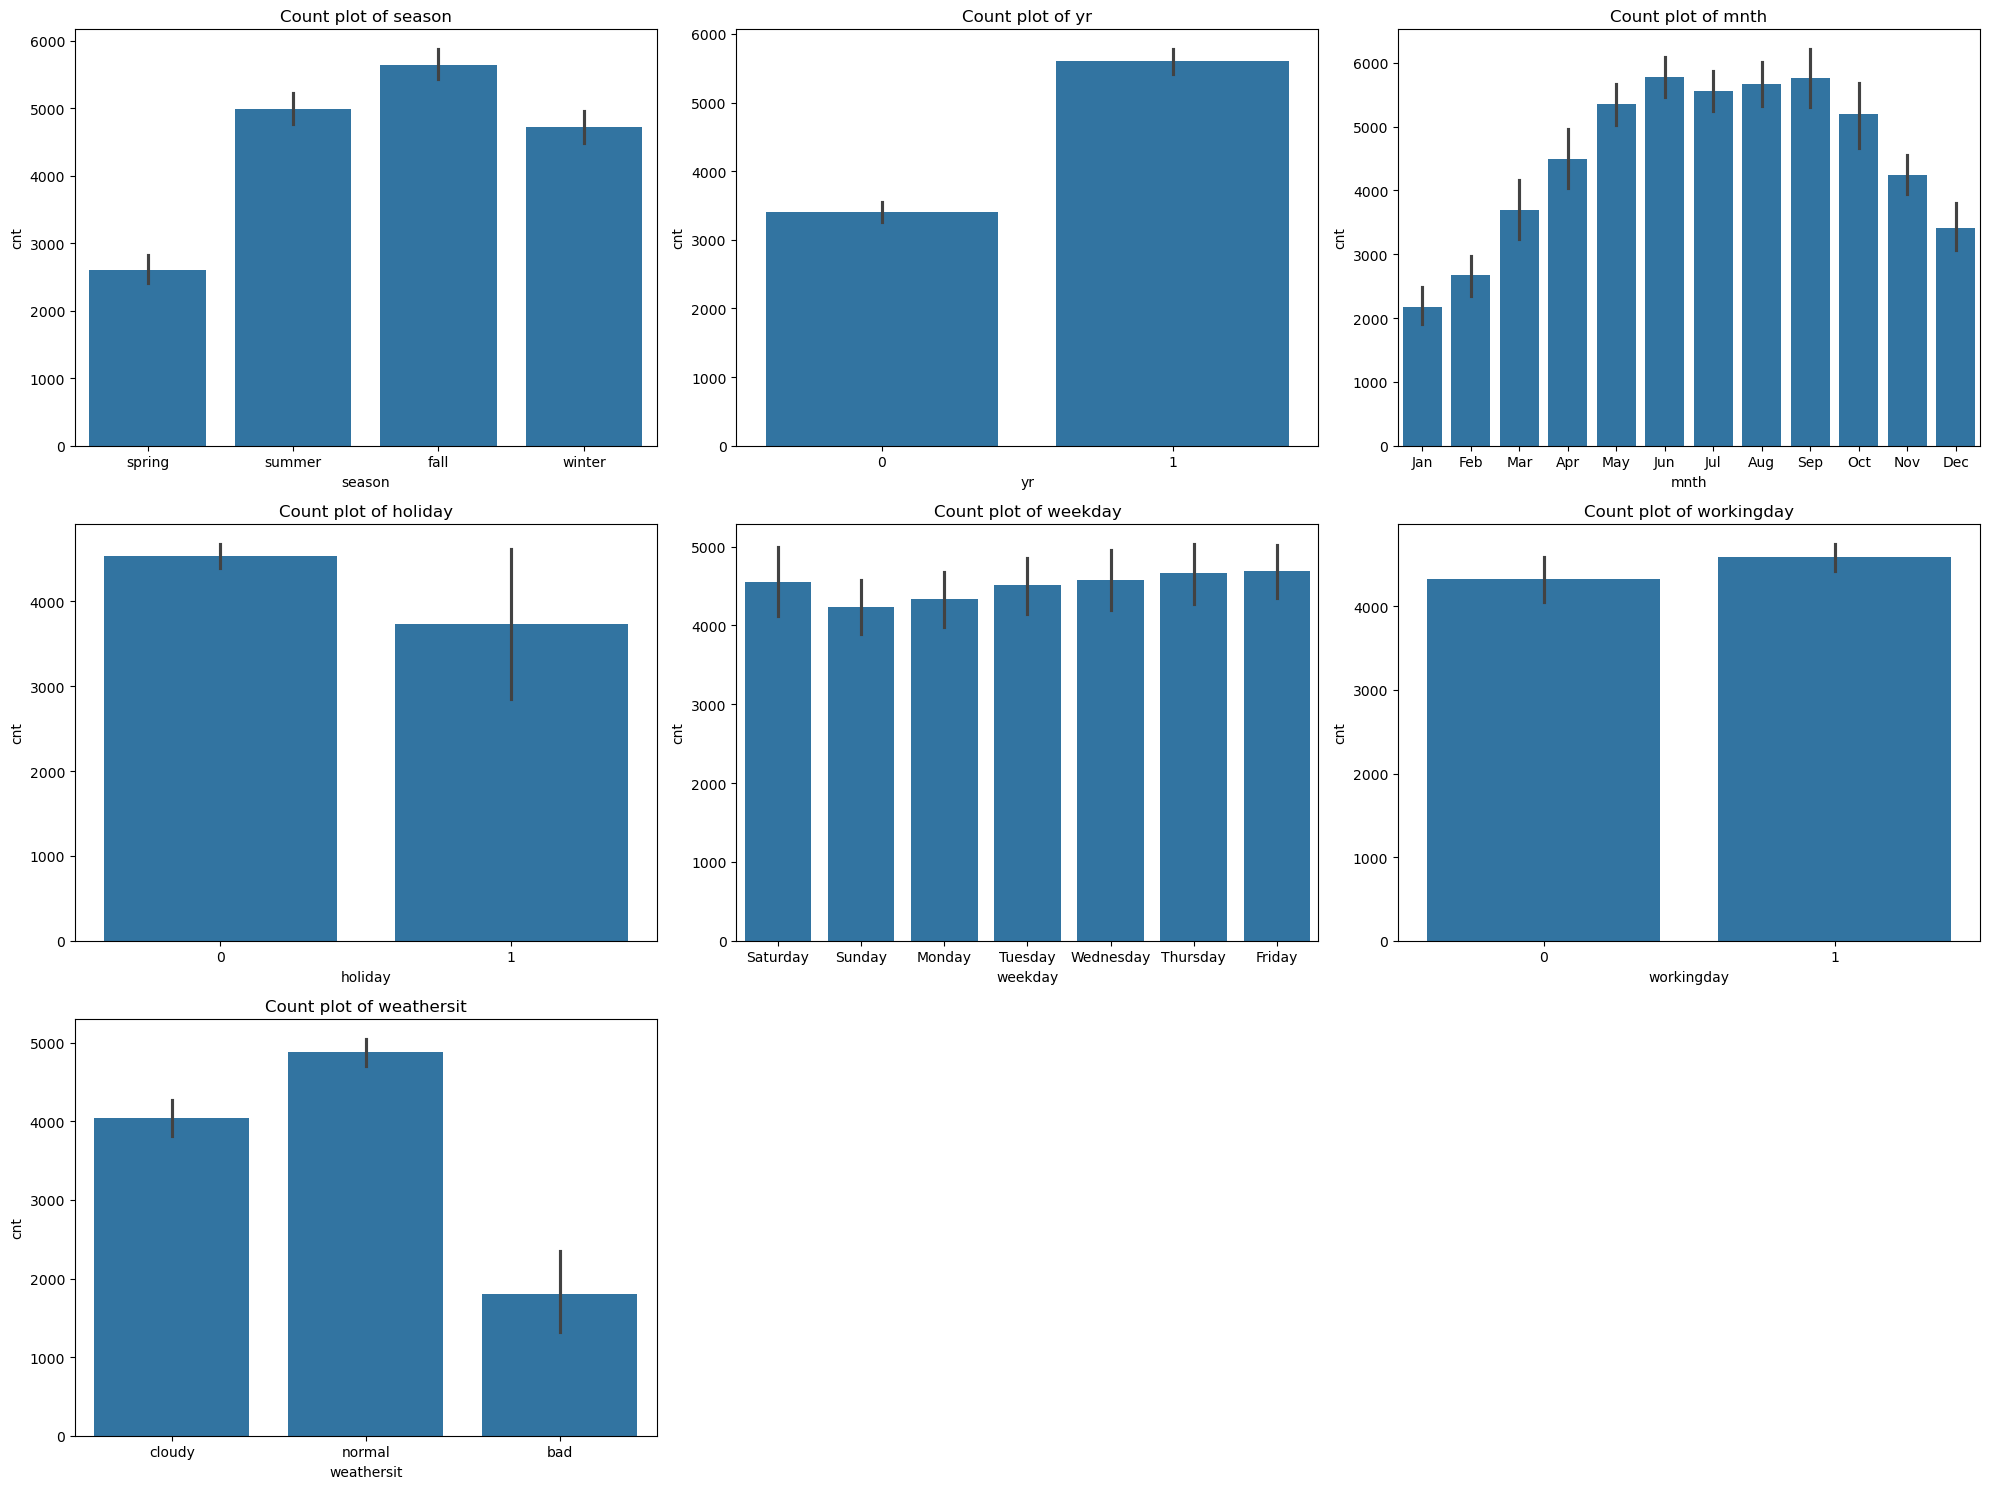

In [21]:
# estimator = mean

plt.figure(figsize=(20,15))

n = len(catcol)

for i in range(n):
    plt.subplot(3,3,i+1)
    sns.barplot(data=df, x=catcol[i], y='cnt')
    plt.title(f'Count plot of {catcol[i]}')

plt.tight_layout()

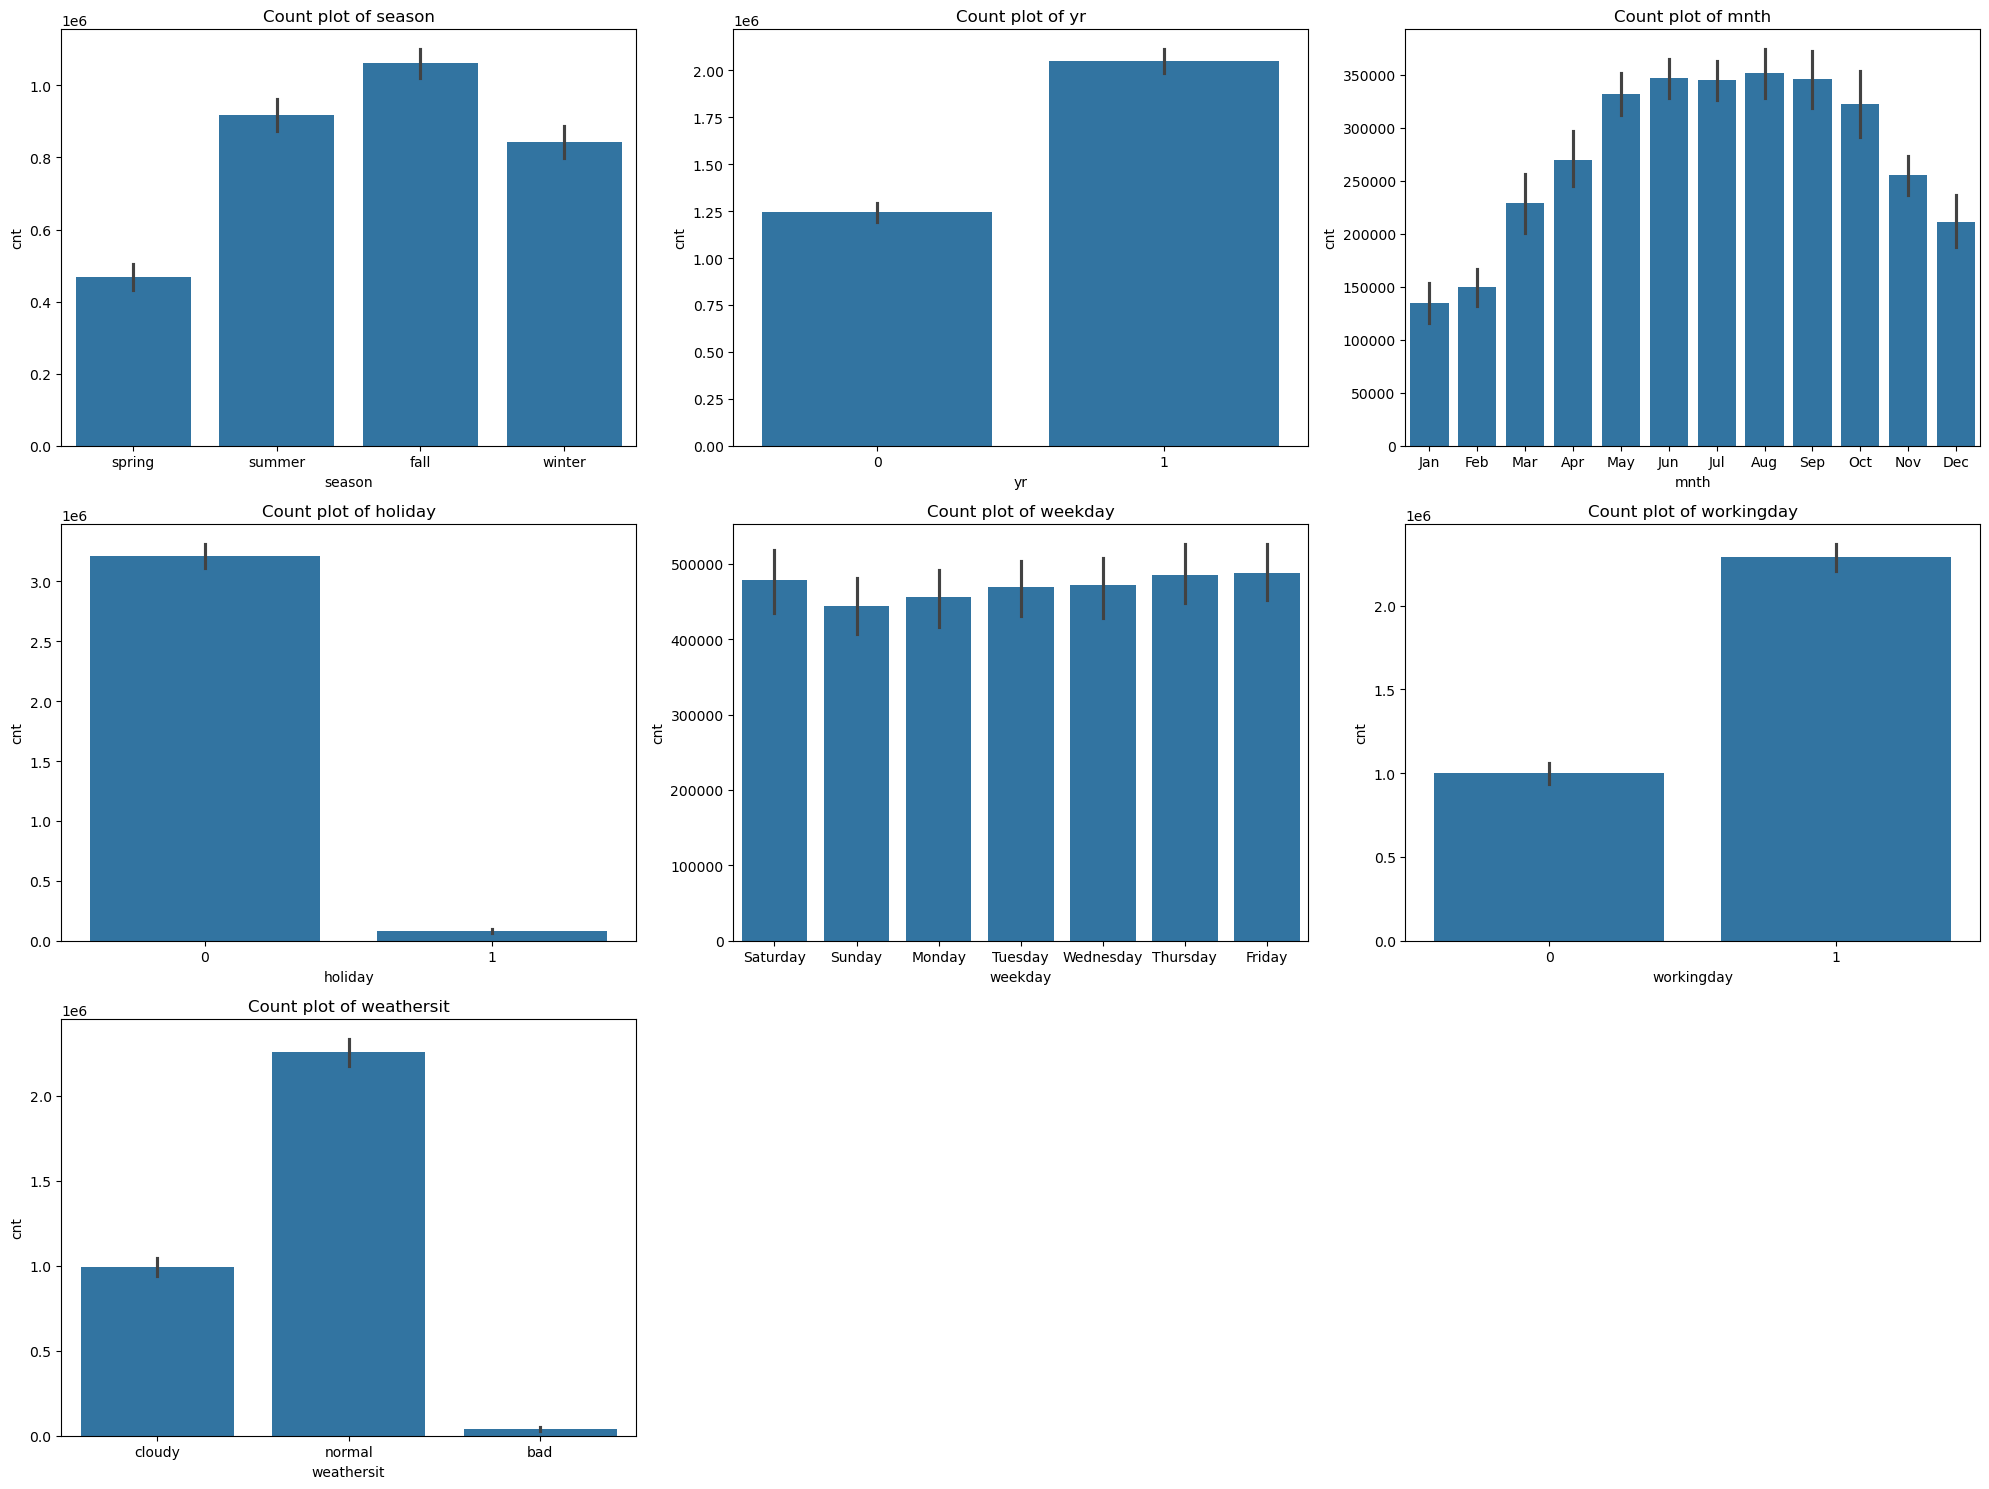

In [22]:
# estimator = sum

plt.figure(figsize=(20,15))

n = len(catcol)

for i in range(n):
    plt.subplot(3,3,i+1)
    sns.barplot(data=df, x=catcol[i], y='cnt', estimator='sum')
    plt.title(f'Count plot of {catcol[i]}')

plt.tight_layout()

#### Observations -

- most of the people rent bike during fall followed by summer season
- most of the people rent bike in year 2019
- most of the bike are rented from April to November
- most of the bike are rented non holidays or working days

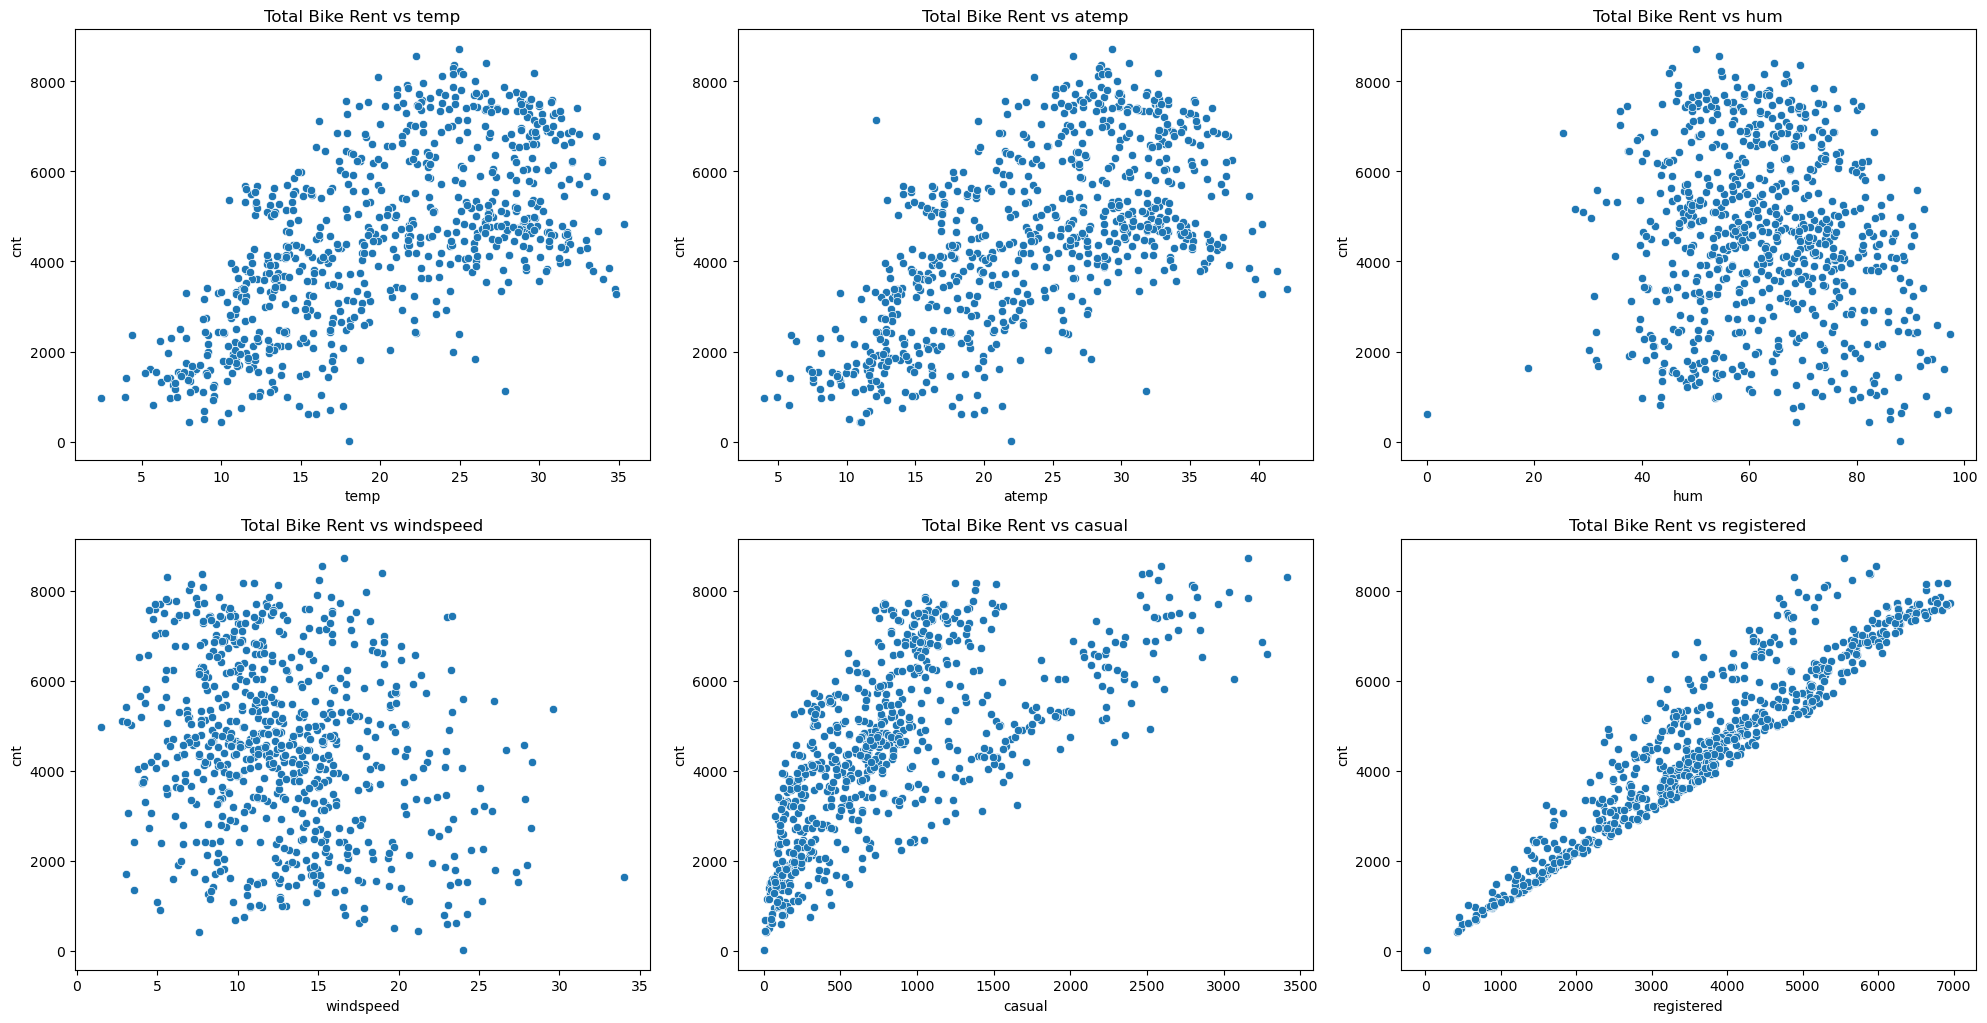

In [23]:
plt.figure(figsize=(20,15))

n = len(numcol)

for i in range(n):
    plt.subplot(3,3,i+1)
    sns.scatterplot(data=df, x=numcol[i], y='cnt')
    # plt.title("Total Bike Rent vs ", regcol[i+6]) -> this is not working because it iterprits as we are passing 2 arguments
    plt.title(f'Total Bike Rent vs {numcol[i]}')

plt.tight_layout()

### Observations
- Temprature is directly proportional to rent count & after 25 deg C we can observe small dip in rent count
- Atemprature is directly proportional to rent count & after 30 deg C we can observe small dip in rent count
- when the humidity is between 40-80, we observe high rent count & don't see paticular pattern
- when the windspeed is less than 20, we observe high rent count & don't see paticular pattern
- rent count is almost linearly related to casual
- rent count is linearly related to registered & both follow a straight line, with slope 2

#### c) Multivariat Analysis - heatmap

In [24]:
corrcol = [col for col in df.select_dtypes(include=['int64','float64']).columns] # creating list consisting of numeric columns

mtrx = df[corrcol].corr() # creating a correlation matrix

<Axes: >

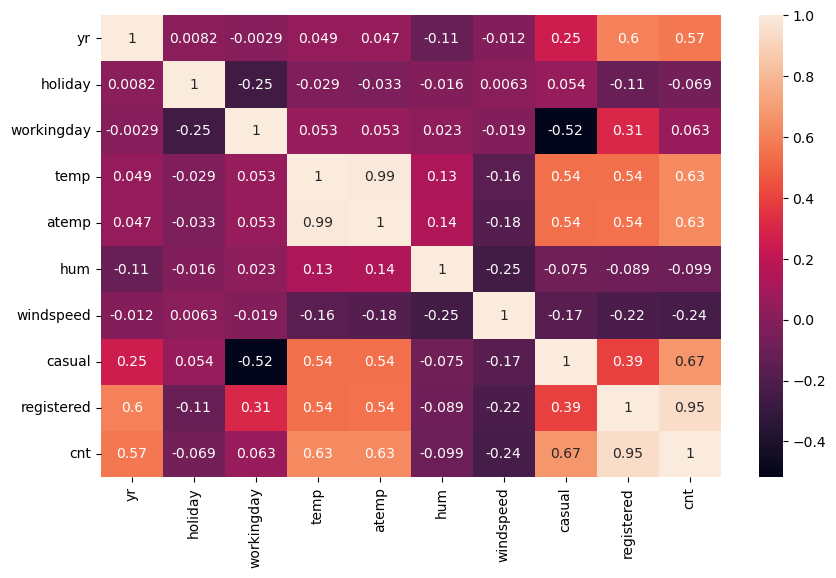

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(mtrx, annot=True) # plotting of heatmap

#### Observations -

- rent count is positively correalted in the order registerd > casual > temp > atemp
- rent count is negatively correalted is in the order windspeed > hum > holiday


In [26]:
# To validate the observations

l = mtrx.unstack()['cnt'] # unstaking into a list
l.sort_values(ascending=False) # sorting the values in the descending order

cnt           1.000000
registered    0.945411
casual        0.672123
atemp         0.630685
temp          0.627044
yr            0.569728
workingday    0.062542
holiday      -0.068764
hum          -0.098543
windspeed    -0.235132
dtype: float64

### 6) Creating the Dummy Columns

In [27]:
# lets drop some unnecessay columns, since dteday contains the date & other features related to date are already derived

df1 = df.drop('dteday', axis=1)

In [28]:
# Selecting only Categorical columns & placing into a list

dumcol = list(df1.select_dtypes(include='object').columns)
dumcol

['season', 'mnth', 'weekday', 'weathersit']

In [29]:
# creating dummy cloumns for all object column, but here column name is by default added as prefix.
# also we are unable to drop 1 categorical level form each column, So lets not go with this method.

pd.get_dummies(df1[dumcol], dtype=int).head()

,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_bad,weathersit_cloudy,weathersit_normal
0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


#### One-Hot Encoding a Categorical Column

In [30]:
# Creating the dummy variables

dumdf = pd.DataFrame() # creating a dummy df

for i in dumcol: # traverisng each categorical column
    temp = pd.get_dummies(df1[i], dtype=int, drop_first=True) # Creating a temp dummy variable for ith column & drop first
    dumdf = pd.concat([dumdf, temp], axis=1) # concating the temp df to dummy df

dumdf.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,normal
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [31]:
# Droping all catergorical columns from the dataframe

df1=df1.drop(dumcol, axis=1)
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [32]:
# Droping the casual & registered columns, as cnt is the sum of both

df1=df1.drop(['casual','registered'], axis=1)
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [33]:
# Concating the dummy dataframe with the dataframe

df1=pd.concat([df1,dumdf], axis=1)
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,normal
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,1


In [34]:
# so we have got everything in either integer or float. Hence we can go ahead for model building

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    int32  
 9   summer      730 non-null    int32  
 10  winter      730 non-null    int32  
 11  Aug         730 non-null    int32  
 12  Dec         730 non-null    int32  
 13  Feb         730 non-null    int32  
 14  Jan         730 non-null    int32  
 15  Jul         730 non-null    int32  
 16  Jun         730 non-null    int32  
 17  Mar         730 non-null    int32  
 18  May         730 non-null    int32  
 19  Nov         730 non-null    i

### 7) Model Building

#### a) import all the required libraies at once

In [35]:
from sklearn.model_selection import train_test_split # it helps to split data into test & train
from sklearn.preprocessing import MinMaxScaler # it helps to scale the features as they are on different scale

import statsmodels.api as sm # it is used to access OLS method
from statsmodels.stats.outliers_influence import variance_inflation_factor # Check for the VIF values of the feature, manual process

from sklearn.linear_model import LinearRegression # it is used with RFE
from sklearn.feature_selection import RFE # it is used to get top n features, automated process
from sklearn.metrics import mean_squared_error, r2_score # to calculate the accuracy of model

#### b) splitting data into test & train

In [36]:
df1train, df1test = train_test_split(df1, test_size=0.3, random_state=0)

ytrain = df1train.cnt
ytest = df1test.cnt

Xtrain = df1train.drop('cnt', axis=1)
Xtest = df1test.drop('cnt', axis=1)

#### c) Scalling the X train data

In [37]:
# since the output is in 2d array format its better we use it directly on dataframe

scaler = MinMaxScaler() # creating the scalar object to scale Xtrain
scaler.fit_transform(Xtrain) # since the output is in 2D array lets do operation on columns

array([[0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [38]:
# the issue is index are getting affected, this is leading to mismatch in ML

scl_Xtrain = scaler.fit_transform(Xtrain)
scl_Xtrain = pd.DataFrame(scl_Xtrain, columns=Xtrain.columns)

scl_Xtrain.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,normal
0,0.0,0.0,1.0,0.753859,0.731037,0.488399,0.527988,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.802869,0.755332,0.254640,0.255430,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.089497,0.071535,0.301044,0.647940,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.821384,0.796115,0.557424,0.281887,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.810494,0.757949,0.527842,0.274080,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [39]:
# creating a list of columns from dataframe

Scl_Col = list(Xtrain.columns)

In [40]:
# Scaling the Xtrain features by column wise

scaler = MinMaxScaler() # creating the scalar object to scale Xtrain

scl_Xtrain = Xtrain # Creating a new dataframe for scaled train data
scl_Xtrain[Scl_Col] = scaler.fit_transform(Xtrain[Scl_Col]) # Scaling the Xtrain data

scl_Xtest = Xtest # Creating a new dataframe for scaled test data
scl_Xtest[Scl_Col] = scaler.transform(Xtest[Scl_Col]) # Scaling the Xtest data


In [41]:
scl_Xtrain.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,normal
235,0.0,0.0,1.0,0.753859,0.731037,0.488399,0.527988,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
524,1.0,0.0,0.0,0.802869,0.755332,0.254640,0.255430,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12,0.0,0.0,1.0,0.089497,0.071535,0.301044,0.647940,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
161,0.0,0.0,0.0,0.821384,0.796115,0.557424,0.281887,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
556,1.0,0.0,1.0,0.810494,0.757949,0.527842,0.274080,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [42]:
ytrain.head()

235    5130
524    7498
12     1406
161    4966
556    7264
Name: cnt, dtype: int64

#### d) Model building using statsmodel

In [43]:
# here we have used all the freatures (31 columns) & its a over fit model

scl_Xtrain_cnst = sm.add_constant(scl_Xtrain) # adding constant to X

statlm = sm.OLS(ytrain, scl_Xtrain_cnst) # initializing the model
statlm = statlm.fit() # fitting the model

statlm.summary() # getting the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     87.33
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          3.28e-169
Time:                        16:16:45   Log-Likelihood:                -4117.6
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     482   BIC:                             8416.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1012.0752    386.614      2.618      0.009     252.418    1771.732
yr          1933.7990     72.136     26.808      0.000    1792.059    2075.539
holiday        8.9157    209.290      0.043      0.966    -402.318     420.149
workingday   459.6696    119.214      3.856      0.000     225.426     693.913
temp        -734.6806   2190.595     -0.335      0.737   -5038.976    3569.614
atemp       4679.0942   2242.519      2.087      0.037     272.774    9085.414
hum        -1331.6386    272.165     -4.893      0.000   -1866.415    -796.863
windspeed  -1047.9681    211.258     -4.961      0.000   -1463.068    -632.869
spring      -854.5717    264.410     -3.232      0.001   -1374.110    -335.034
summer       -83.4369    217.625     -0.383      0.702    -511.049     344.175
winter       496.1848    254.547      1.949      0.052      -3.975     996.344
Aug         -134.5203    297.329     -0.452      0.651    -718.742     449.702
Dec         -440.0238    301.360     -1.460      0.145   -1032.166     152.119
Feb         -373.7765    289.004     -1.293      0.197    -941.641     194.088
Jan         -463.7920    299.766     -1.547      0.122   -1052.802     125.218
Jul         -646.4653    307.321     -2.104      0.036   -1250.319     -42.612
Jun         -183.0145    226.990     -0.806      0.420    -629.027     262.998
Mar           73.1870    220.869      0.331      0.741    -360.798     507.172
May          336.6477    182.667      1.843      0.066     -22.274     695.570
Nov         -557.1017    326.630     -1.706      0.089   -1198.897      84.693
Oct           95.4229    316.502      0.301      0.763    -526.470     717.316
Sep          480.3449    277.844      1.729      0.084     -65.591    1026.280
Monday      -215.1115    135.303     -1.590      0.113    -480.967      50.744
Saturday     451.1507    134.045      3.366      0.001     187.766     714.535
Sunday        92.3391    137.496      0.672      0.502    -177.827     362.505
Thursday     -34.9966    133.067     -0.263      0.793    -296.460     226.466
Tuesday     -169.8419    133.812     -1.269      0.205    -432.768      93.084
Wednesday    -32.5728    131.181     -0.248      0.804    -290.331     225.185
cloudy      1302.3292    254.967      5.108      0.000     801.346    1803.313
normal      1664.6843    275.165      6.050      0.000    1124.013    2205.355
==============================================================================
Omnibus:                       92.488   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.121
Skew:                          -0.876   Prob(JB):                     8.91e-57
Kurtosis:                       6.009   Cond. No.                     4.73e+15
==============================================================================

N

#### e) Model building using sklearn

In [44]:
# Creating a model using sklearn & selecting top 15 features

sklm = LinearRegression() # creating object of lr model

rfe = RFE(sklm, n_features_to_select=15) # running RFE & selecting top 15 features
rfe = rfe.fit(scl_Xtrain, ytrain) # fitting the rfe

In [45]:
# selecing only top 15 features of the model

TopNCol = scl_Xtrain.columns[rfe.support_]
TopNCol

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'Jul', 'Sep', 'Saturday', 'Sunday', 'cloudy',
       'normal'],
      dtype='object')

In [46]:
# getting the detailed list of features & its rank

list(zip(scl_Xtrain.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 3),
 ('Feb', False, 5),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 13),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 7),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 14),
 ('Tuesday', False, 8),
 ('Wednesday', False, 15),
 ('cloudy', True, 1),
 ('normal', True, 1)]

#### f) Iteration to get the Final Model

#### uptill now we have top 15 features

In [47]:
# Creating a copy of Top 15 Features

FnlCol = TopNCol
FnlCol

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'Jul', 'Sep', 'Saturday', 'Sunday', 'cloudy',
       'normal'],
      dtype='object')

#### Creating a function that takes only selected few freatures from the Top N features

In [48]:
# creating a function that selects only the required features from Top N features

def get_model(dcol=0):

    global scl_Xtrain, FnlCol # use golbal variables

    Xtrain_itr = scl_Xtrain[FnlCol] # select only required features

    if dcol != 0: # if the column to drop is given
        Xtrain_itr = Xtrain_itr.drop(dcol, axis=1) # drop the column form the list
        FnlCol = Xtrain_itr.columns # update the final column list
    
    Xtrain_itr_cnst = sm.add_constant(Xtrain_itr) # adding constant for Xtrain
    statlm = sm.OLS(ytrain, Xtrain_itr_cnst) # initalize the object
    statlm = statlm.fit() # fitting the model
    print(statlm.summary()) # 

    print()
    print()


    VIF = pd.DataFrame()

    VIF['Features'] = Xtrain_itr.columns # dataframe has features with column name
    VIF['vif'] = [(variance_inflation_factor(Xtrain_itr.values, i)) for i in range(Xtrain_itr.shape[1])] # updating the vif values

    VIF=VIF.sort_values(by='vif', ascending=False)
    VIF = VIF.reset_index(drop=True)
    print(VIF)

In [49]:
# Analysing the model with top 15 features

get_model()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.49e-176
Time:                        16:16:46   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     496   BIC:                             8365.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        649.9580    324.686      2.002      0.0

In [50]:
# from above we see that temp has high p-values so lets drop it & rebuild the model

get_model('temp')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     177.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.37e-177
Time:                        16:16:46   Log-Likelihood:                -4136.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8359.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        665.3452    323.837      2.055      0.0

In [51]:
# from above we see that Sunday has high p-values so lets drop it & rebuild the model

get_model('Sunday')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     177.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.37e-177
Time:                        16:16:46   Log-Likelihood:                -4136.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8359.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        777.3978    416.838      1.865      0.0

In [52]:
# from above we see that holiday has high p-values so lets drop it & rebuild the model

get_model('holiday')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     192.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.59e-178
Time:                        16:16:46   Log-Likelihood:                -4137.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     498   BIC:                             8355.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        712.1824    414.738      1.717      0.0

In [53]:
# from above we see that atemp has high high vif value so lets drop it & rebuild the model

get_model('atemp')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     127.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.10e-137
Time:                        16:16:46   Log-Likelihood:                -4236.2
No. Observations:                 511   AIC:                             8496.
Df Residuals:                     499   BIC:                             8547.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2555.1591    481.528      5.306      0.0

In [54]:
# from above we see that hum has high p-values so lets drop it & rebuild the model

get_model('hum')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.51e-138
Time:                        16:16:46   Log-Likelihood:                -4236.6
No. Observations:                 511   AIC:                             8495.
Df Residuals:                     500   BIC:                             8542.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2263.0625    345.240      6.555      0.0

In [55]:
# from above we see that Jul has high p-values so lets drop it & rebuild the model

get_model('Jul')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     156.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          3.56e-139
Time:                        16:16:46   Log-Likelihood:                -4237.2
No. Observations:                 511   AIC:                             8494.
Df Residuals:                     501   BIC:                             8537.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2307.9715    342.894      6.731      0.0

In [56]:
# so our final model has following features

FnlCol

Index(['yr', 'workingday', 'windspeed', 'spring', 'winter', 'Sep', 'Saturday',
       'cloudy', 'normal'],
      dtype='object')

In [57]:
# this the final train data used to build the model

scl_Xtrain[FnlCol]

,yr,workingday,windspeed,spring,winter,Sep,Saturday,cloudy,normal
235,0.0,1.0,0.527988,0.0,0.0,0.0,0.0,0.0,1.0
524,1.0,0.0,0.255430,0.0,0.0,0.0,1.0,0.0,1.0
12,0.0,1.0,0.647940,1.0,0.0,0.0,0.0,0.0,1.0
161,0.0,0.0,0.281887,0.0,0.0,0.0,1.0,0.0,1.0
556,1.0,1.0,0.274080,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
707,1.0,0.0,0.289714,0.0,1.0,0.0,0.0,1.0,0.0
192,0.0,1.0,0.395608,0.0,0.0,0.0,0.0,0.0,1.0
629,1.0,0.0,0.604317,0.0,0.0,1.0,1.0,0.0,1.0
559,1.0,0.0,0.253907,0.0,0.0,0.0,1.0,1.0,0.0


### 8) Building the final model & Evalvating it

In [58]:
# using statsmodels
# R-square value is 0.737, which tells accuracy of 73.7%
# Prob(F-stat) is almost zero, which tells model is significant
# P-value of all the variables are less than 0.05, which tells all the coefficients are significant
# VIF score of variables is less than 10, indicates that the corelation is less.

get_model()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     156.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          3.56e-139
Time:                        16:16:47   Log-Likelihood:                -4237.2
No. Observations:                 511   AIC:                             8494.
Df Residuals:                     501   BIC:                             8537.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2307.9715    342.894      6.731      0.0

In [59]:
# using sklearn

sklm = LinearRegression() # object creation

sklm.fit(scl_Xtrain[FnlCol], ytrain) # fitting / training the model

ypred = sklm.predict(scl_Xtest[FnlCol]) # predicting the y values for test data

#### Checks for linear regression assumptions 

<Axes: xlabel='cnt', ylabel='Count'>

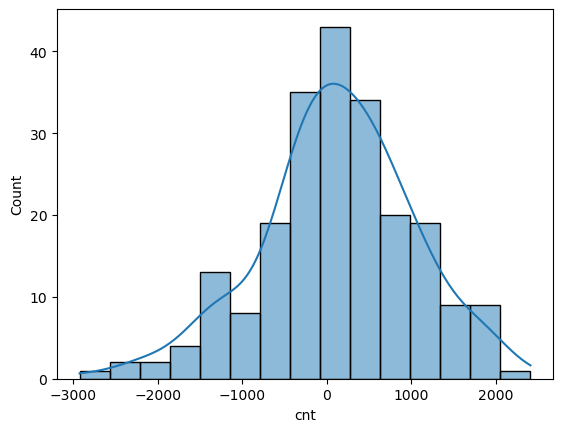

In [60]:
# Normality of residuals - it is assume that the error term is normally distributed

sns.histplot(ytest-ypred, kde=True, bins=15)

Text(0, 0.5, 'Residual')

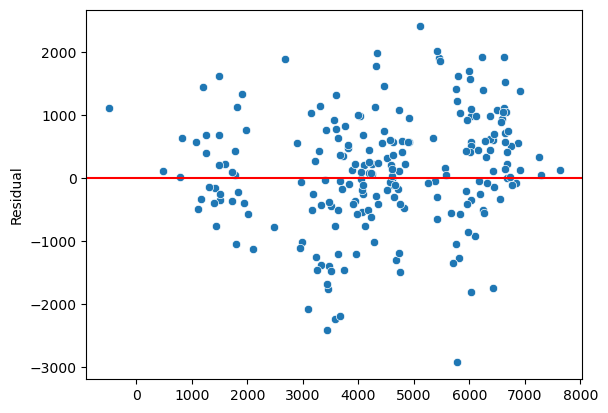

In [61]:
# Homoscedacity - The variance of the residuals is constant across all values of the independent variable.
# althoug we see small heteroscedasticity in below graph, as the y value is increasing, residuals are also increasing.

sns.scatterplot(x=ypred , y=ytest-ypred)
plt.axhline(color="red") #plot a horizental line with y intersept zero
plt.ylabel("Residual")

Text(0, 0.5, 'Residual')

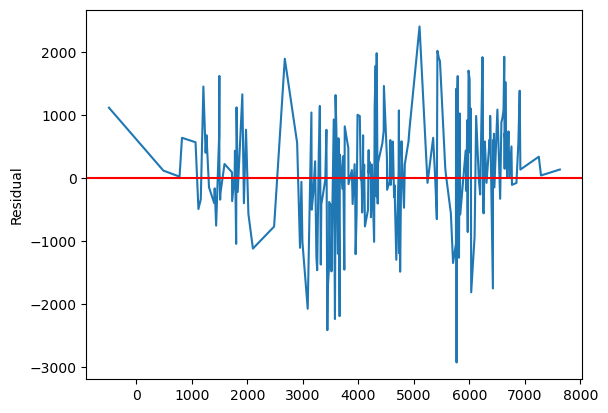

In [62]:
# No autocorrelation of residuals - When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values.
# since we dont observe any paticular pattern, we can conclude there is no autocorrelation of residuals.

sns.lineplot(x=ypred , y=ytest-ypred)
plt.axhline(color="red")
plt.ylabel("Residual")

In [63]:
d = {'feature':list(sklm.feature_names_in_), 'coef':list(sklm.coef_)}
d = pd.DataFrame(d).sort_values('coef', ascending=False)
d.reset_index(drop=True)

,feature,coef
0,normal,2308.682823
1,yr,2063.282429
2,cloudy,1576.843638
3,Sep,757.464164
4,Saturday,354.076984
5,workingday,345.559726
6,winter,-592.693564
7,windspeed,-1230.703323
8,spring,-2472.445482


In [64]:
# R-square values

r2_score(ytest, ypred)

0.7986420531285991